<a href="https://colab.research.google.com/github/keanfdes30/SHALA2020/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bab1ebda0>,
      dtype=object)

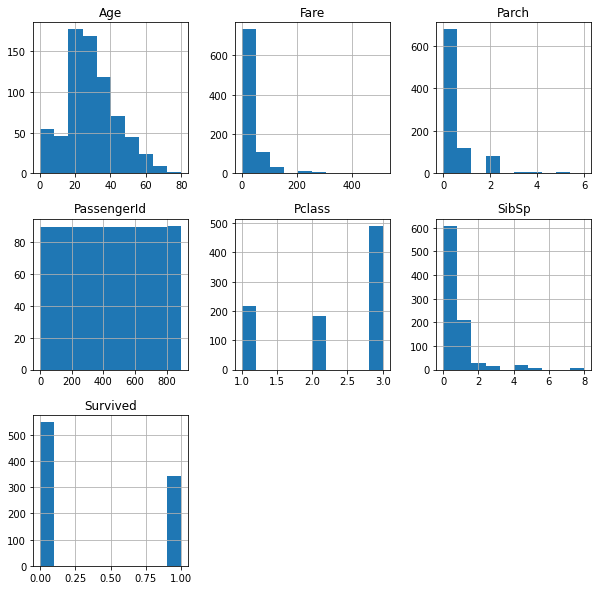

In [ ]:
titanic_data.hist(figsize = (10,10))

In [ ]:
titanic_data = titanic_data.drop(['PassengerId','Ticket'],axis=1)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [ ]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

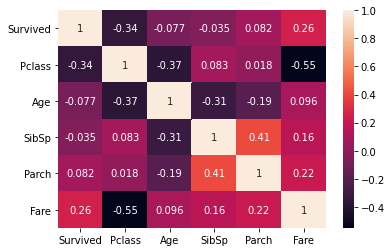

In [ ]:
sns.heatmap(titanic_data.corr(),annot = True)

In [ ]:
#strong correlation b/w age and pclass
titanic_data.loc[titanic_data.Age.isnull(), 'Age'] = titanic_data.groupby("Pclass").Age.transform('median')

In [ ]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode(titanic_data['Embarked']))
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('U')

In [ ]:
titanic_data_new = pd.get_dummies(titanic_data['Embarked'],prefix='Embarked')
titanic_data_new = pd.concat([titanic_data,titanic_data_new],axis = 1)
titanic_data_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,U,S,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,U,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,U,S,0,0,1


In [ ]:
titanic_data_new = titanic_data_new.drop(['Embarked'],axis = 1)
titanic_data_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,U,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,U,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,U,0,0,1


In [ ]:
import re

def get_title(name):
    title_search=re.search(' ([A-Za-z]+)\.',name)
    if(title_search):
        return title_search.group(1)
    return ""

titanic_data_new["Title"]=titanic_data_new["Name"].apply(get_title)
titanic_data_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,U,0,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,U,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,U,0,0,1,Mr


In [ ]:
titanic_data_new['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Ms            1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Don           1
Sir           1
Name: Title, dtype: int64

In [ ]:
titanic_data_new["Title"]=titanic_data_new["Title"].replace(['Dr','Rev','Major','Col','Capt','Sir','Don','Lady','Countess','Jonkheer'],'Nobility')
titanic_data_new["Title"]=titanic_data_new["Title"].replace(['Mlle','Ms'],'Miss')
titanic_data_new["Title"]=titanic_data_new["Title"].replace('Mme','Mrs')
titanic_data_new["Title"].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Nobility     23
Name: Title, dtype: int64

In [ ]:
titanic_data_new[titanic_data_new['Title'] == 'Master']['Survived'].value_counts()

1    23
0    17
Name: Survived, dtype: int64

No bias therefore will remain in own section

In [ ]:
titanic_data_new = titanic_data_new.drop(['Name'],axis = 1)

In [ ]:
titanic_data_new['Sex'].replace(['male','female'],[0,1],inplace = True)
titanic_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,0,22.0,1,0,7.2500,U,0,0,1,Mr
1,1,1,1,38.0,1,0,71.2833,C85,1,0,0,Mrs
2,1,3,1,26.0,0,0,7.9250,U,0,0,1,Miss
3,1,1,1,35.0,1,0,53.1000,C123,0,0,1,Mrs
4,0,3,0,35.0,0,0,8.0500,U,0,0,1,Mr


In [ ]:
titanic_data_new['Cabin'] = titanic_data_new['Cabin'].map(lambda x:x[0])
titanic_data_new.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
temp = pd.get_dummies(titanic_data_new['Cabin'],prefix='Cabin')
titanic_data_new = pd.concat([titanic_data_new,temp],axis = 1)
titanic_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,3,0,22.0,1,0,7.2500,U,0,0,1,Mr,0,0,0,0,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0,Mrs,0,0,1,0,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,U,0,0,1,Miss,0,0,0,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,C,0,0,1,Mrs,0,0,1,0,0,0,0,0,0
4,0,3,0,35.0,0,0,8.0500,U,0,0,1,Mr,0,0,0,0,0,0,0,0,1


In [ ]:
titanic_data_new = titanic_data_new.drop(['Cabin'], axis = 1)
titanic_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,3,0,22.0,1,0,7.2500,0,0,1,Mr,0,0,0,0,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0,Mrs,0,0,1,0,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,Miss,0,0,0,0,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,Mrs,0,0,1,0,0,0,0,0,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,Mr,0,0,0,0,0,0,0,0,1


In [ ]:
temp = pd.get_dummies(titanic_data_new['Title'],prefix='Title')
titanic_data_new = pd.concat([titanic_data_new,temp],axis = 1)
titanic_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility
0,0,3,0,22.0,1,0,7.2500,0,0,1,Mr,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,Mrs,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,Miss,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,Mrs,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,Mr,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
titanic_data_new = titanic_data_new.drop(['Title'],axis = 1)
titanic_data_new.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = titanic_data_new.drop(['Survived'], axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility
0,3,0,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3,0,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
y = titanic_data_new['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X, y, test_size = 0.2,random_state = 111)

# Beginning model training

### Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 111)

In [ ]:
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7, 10]    
}

dt_CV = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
dt_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=111,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
dt_CV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}

In [ ]:
dt = DecisionTreeClassifier(random_state = 111,criterion='entropy',max_depth = 10,max_features='auto')
dt.fit(X_train,y_train)
print(metrics.accuracy_score(dt.predict(X_test),y_test))

0.770949720670391


### Random Tree Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 111)

In [ ]:
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'max_features': ['auto', 'log2'],
    'n_estimators': [100, 300, 500],
    'max_depth' : [3, 5, 7, 10]    
}

rfc_CV = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
rfc_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=111,
                                 

In [ ]:
rfc_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
rfc = RandomForestClassifier(random_state=111,criterion='entropy',max_depth = 7, max_features='auto',n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)

In [ ]:
print(metrics.accuracy_score(rfc.predict(X_test),y_test))

0.8435754189944135


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(X_train,y_train)
print(metrics.accuracy_score(adb.predict(X_test),y_test))

0.8379888268156425


In [ ]:
from sklearn.linear_model import LogisticRegression
Cvals = []
for i in np.arange(0.05,0.2,0.01):
  lregr = LogisticRegression(C=i,solver = 'newton-cg',random_state = 111)
  lregr.fit(X_train,y_train)
  ylregr = lregr.predict(X_test)
  Cvals.append(metrics.accuracy_score(ylregr,y_test))

In [ ]:
Cvals = np.array(Cvals)
print(f"{Cvals.max()} at {0.05+((Cvals.argmax()+1)*0.01)}")

0.8324022346368715 at 0.16


In [ ]:
temp = 0.05+((Cvals.argmax()+1)*0.01)
lregr = LogisticRegression(C=temp,solver = 'newton-cg',random_state = 111)
lregr.fit(X_train,y_train)

LogisticRegression(C=0.16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
x_train_norm = MinMaxScaler().fit_transform(X_train)
x_test_norm = MinMaxScaler().fit_transform(X_test)
svc = SVC(C=0.11)
svc.fit(x_train_norm,y_train)
print(metrics.accuracy_score(svc.predict(x_test_norm),y_test))

0.7932960893854749


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(y_test.value_counts())
print(f"rfc:{metrics.accuracy_score(rfc.predict(X_test),y_test)}\n {confusion_matrix(rfc.predict(X_test),y_test)}")
print(f"adaboost:{metrics.accuracy_score(adb.predict(X_test),y_test)}\n {confusion_matrix(adb.predict(X_test),y_test)}")
print(f"logregression:{metrics.accuracy_score(lregr.predict(X_test),y_test)}\n {confusion_matrix(lregr.predict(X_test),y_test)}")
print(f"svc:{metrics.accuracy_score(svc.predict(x_test_norm),y_test)}\n {confusion_matrix(svc.predict(x_test_norm),y_test)}")

0    113
1     66
Name: Survived, dtype: int64
rfc:0.8435754189944135
 [[101  16]
 [ 12  50]]
adaboost:0.8379888268156425
 [[101  17]
 [ 12  49]]
logregression:0.8324022346368715
 [[99 16]
 [14 50]]
svc:0.7932960893854749
 [[95 19]
 [18 47]]


In [ ]:
print(f"rfc:\n{metrics.classification_report(rfc.predict(X_test),y_test)}")
print(f"adaboost:\n{metrics.classification_report(adb.predict(X_test),y_test)}")
print(f"logregression:\n{metrics.classification_report(lregr.predict(X_test),y_test)}")
print(f"svc:\n{metrics.classification_report(svc.predict(x_test_norm),y_test)}")

rfc:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       117
           1       0.76      0.81      0.78        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179

adaboost:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       118
           1       0.74      0.80      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179

logregression:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       115
           1       0.76      0.78      0.77        64

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

rand = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05,max_depth=1, random_state=111).fit(X_train, y_train)
print(confusion_matrix(rand.predict(X_test),y_test))

[[102  16]
 [ 11  50]]


In [ ]:
print(metrics.accuracy_score(rand.predict(X_test),y_test))

0.8491620111731844


In [ ]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators = [('lr', lregr), ('rfc', rfc), ('adb', adb),('gb',rand)], voting = 'hard')
clf.fit(X_train,y_train)
print(metrics.accuracy_score(clf.predict(X_test),y_test))
print(f"{confusion_matrix(clf.predict(X_test),y_test)}\n")
print(classification_report(clf.predict(X_test),y_test))

0.8603351955307262
[[103  15]
 [ 10  51]]

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       118
           1       0.77      0.84      0.80        61

    accuracy                           0.86       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



Slightly improved by combining best performing models with VotingClassifier